In [108]:
import numpy as np
import spacy
import pandas as pd

import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file

from collections import Counter

In [79]:
nlp = spacy.load('en')

In [80]:
#spacy preprocess text
#read in war and peace file
#war_peace_raw = open("input/war_and_peace.txt").read()
#load sentences using gensim
ai_raw = open("input/ai_awakening.txt").read()
sentences = gensim.models.word2vec.LineSentence("input/ai_awakening.txt")

In [81]:
#parse raw data using spacy
#war_peace = nlp(war_peace_raw)
ai = nlp(ai_raw)


In [124]:
#create model using gensim sentences
new_model = gensim.models.Word2Vec(sentences, size=50, window=5, min_count=2, iter=20)
len(new_model.wv.vocab)

1450

In [126]:
#get top 1000 words that are not stop words and are in alphabet and not punct.
#war_peace_ = [w for w in war_peace if w.is_stop == False]
#war_peace_ = [w for w in war_peace_ if w.pos_ != "PUNCT" and w.is_alpha == True]
#top1000 = Counter([w.string.strip() for w in war_peace_]).most_common(1000)
#top1000 = [item[0] for item in top1000]
#top1000 = [item for item in top1000 if item in new_model.wv.vocab]

ai_ = [w for w in ai if w.is_stop == False ] #and w.is_stop==False]

data = Counter([w.string.strip() for w in ai_]).most_common(len(ai_))

data = [item[0] for item in data]
#data
#len(data)
data = [item for item in new_model.wv.vocab if item in data]
#words = []
#for w in data:
 #   if w in new_model.wv.vocab:
  #      words.append(w)

len(data)

#new_model.wv.vocab

854

In [127]:
#change into 2 dimensions and visualize using TSNE
tsne = TSNE(n_components=2, random_state=0)
#words_war_peace_tsne = tsne.fit_transform(new_model[top1000])
words_ai_tsne = tsne.fit_transform(new_model[data])

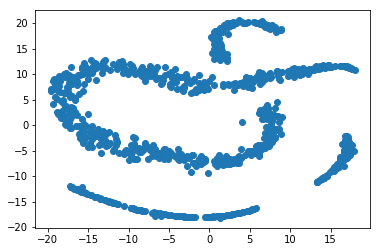

In [128]:
#this plots all words, not very informative

#plt.scatter(words_war_peace_tsne[:, 0], words_war_peace_tsne[:, 1])
#plt.show()
plt.scatter(words_ai_tsne[:, 0], words_ai_tsne[:, 1])
plt.show()
words = [item[0] for item in new_model.wv.vocab]


In [129]:
#using bokeh, adds labels
'''
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=words_war_peace_tsne[:,0],
                                    x2=words_war_peace_tsne[:,1],
                                    names=top1000))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)
'''
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=words_ai_tsne[:,0],
                                    x2=words_ai_tsne[:,1],
                                    names=data))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)